In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ssb
from sklearn.preprocessing import LabelEncoder

loading data

In [2]:
train=pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As we can see in the the describe of train that in the column applicantincome,coapplicantincome and loanamount have outlier because maximum value are way greater than the general values.

<AxesSubplot:>

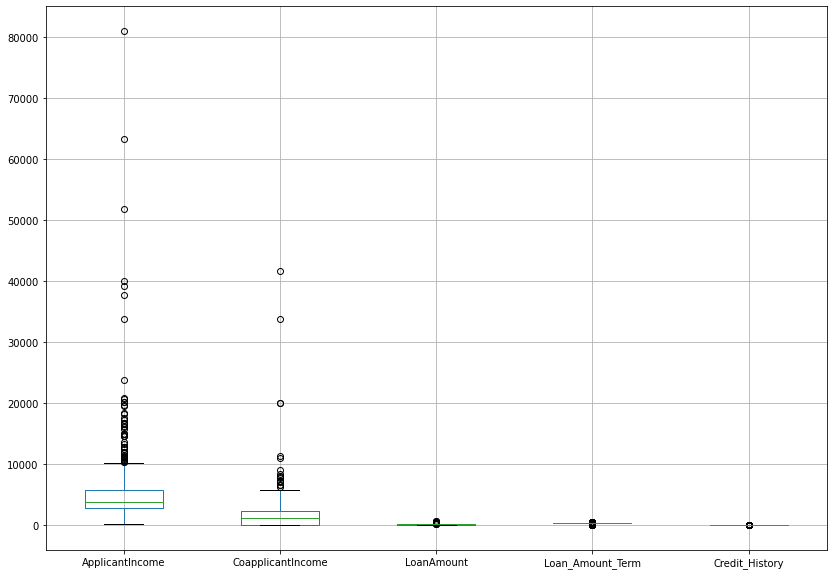

In [5]:
train.boxplot(figsize=(14,10))

In [6]:
train[train.ApplicantIncome>=50000]
#train.drop((drop),axis=0,inplace=True)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [7]:
train[train.CoapplicantIncome>=20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

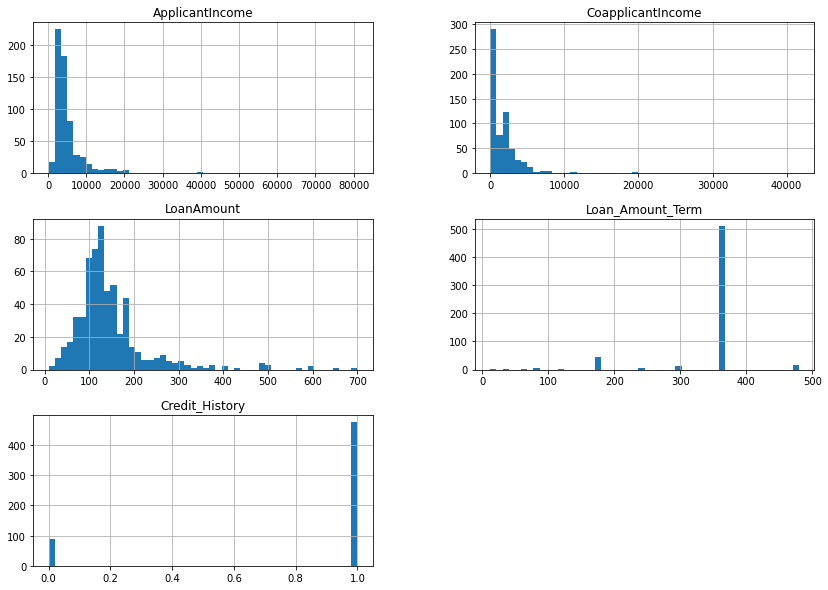

In [8]:
train.hist(bins=50,figsize=(14,10))

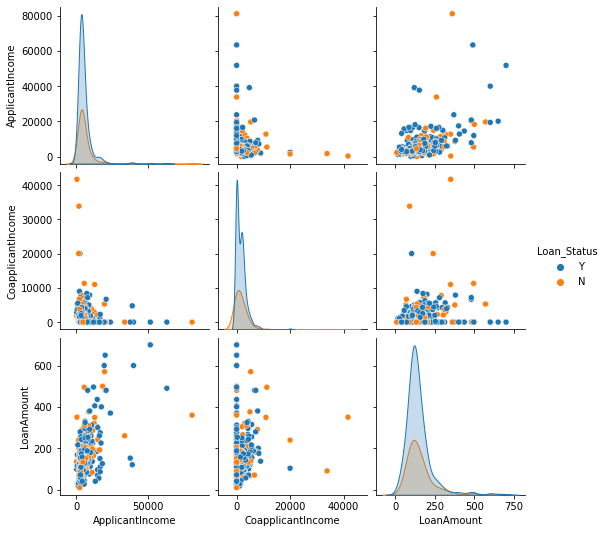

In [9]:
ssb.pairplot(data=train,vars=['ApplicantIncome','CoapplicantIncome','LoanAmount'],hue='Loan_Status')

In [10]:
train.Loan_Status=train.Loan_Status.map({'Y':1,'N':0})
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


After looking to correlation of loan status to these columns who have outliers they are not very much corelated to the loan status.That's why I don't drop the outliers because we don't have enough rows.

In [11]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [12]:
test=pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv')

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

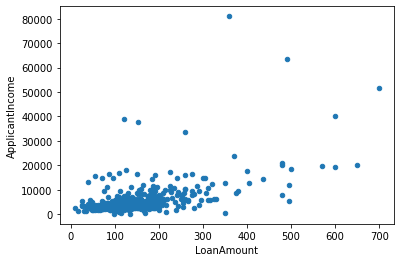

In [13]:
train.plot(kind='scatter',x='LoanAmount',y='ApplicantIncome')

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

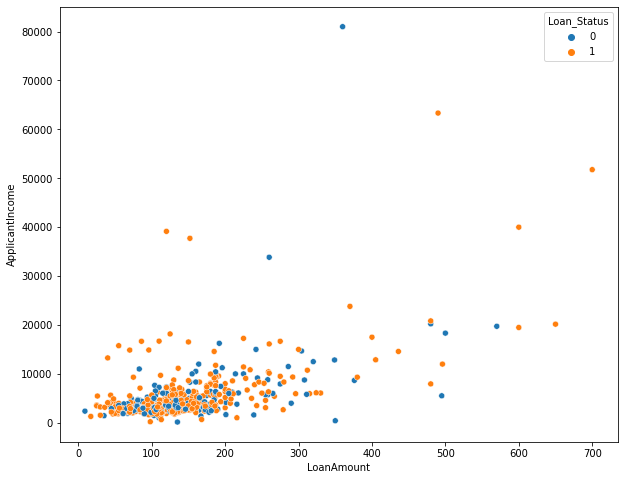

In [14]:
plt.figure(figsize=(10,8))
ssb.scatterplot(x=train['LoanAmount'],y=train['ApplicantIncome'],hue=train['Loan_Status'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

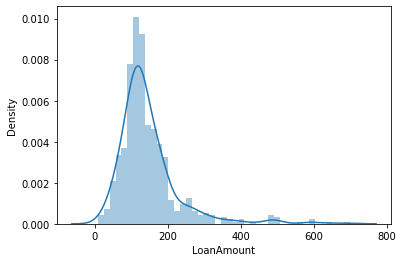

In [15]:
ssb.distplot(train.LoanAmount)

As we can see that credit history is very important variable by the help of correlation table.

In [16]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

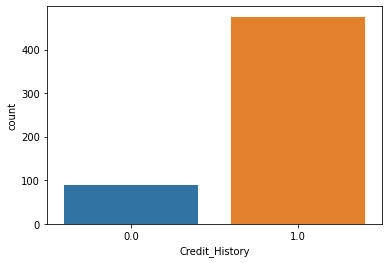

In [17]:
ssb.countplot(train.Credit_History)

In [18]:
train.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

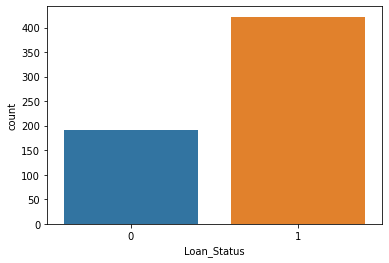

In [19]:
ssb.countplot(train.Loan_Status)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

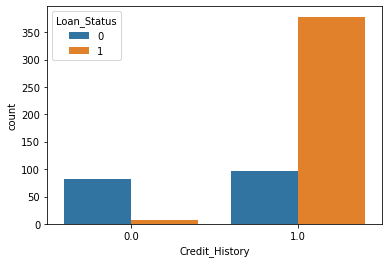

In [20]:
ssb.countplot(train.Credit_History,hue=train.Loan_Status)

In the the visualisation also we can see that when the credit history is 0 we have very less chance to get the loan

# Missing values

In [21]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
train.corr().Loan_Status

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [23]:
from scipy.stats import chi2_contingency

In [24]:
def chi2(x):
    score,p_value,_,_=chi2_contingency(x)
    return score,p_value

In [25]:
cat=train.select_dtypes(include=['object'])
cat.drop(['Loan_ID'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
score=[]
p_value=[]
element=cat.columns
element

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [27]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area','Credit_History']:
    chi=pd.crosstab(train[i],train.Loan_Status)
    d,p=chi2(chi)
    score.append(d)
    p_value.append(p)
    print(i,d,p)

Gender 0.13962612116543877 0.7086529816451106
Married 4.475019348315097 0.03439381301579988
Dependents 3.158339770698263 0.3678506740863211
Education 4.091490413303621 0.04309962129357355
Self_Employed 0.0 1.0
Property_Area 12.297623130485675 0.0021360187811644937
Credit_History 174.63729658142535 7.184759548750746e-40


Here we can see that when we perform Chi square test then the the p-value of credit history is very low other than credit history popular area,education and married have low P-value as compared to others category variable.it means these are important variable.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

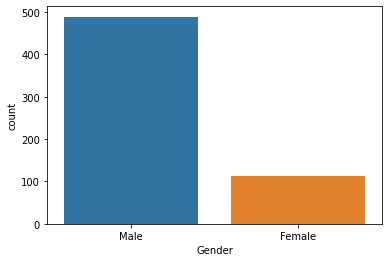

In [28]:
ssb.countplot(train.Gender)

I just fill the the missing value with the mode of the the column other than credit history because it is very important variable.

In [29]:
for i in element:
    train[i].fillna(train[i].mode()[0],inplace=True)
    test[i].fillna(test[i].mode()[0],inplace=True)

In [30]:
train.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [31]:
test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [32]:
train_1=train.drop(['Loan_Status'],axis=1)

In [33]:
data=pd.concat((train_1,test),axis=0)

In [34]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [35]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural


In [36]:
df=data.drop(['Loan_ID'],axis=1)

In [37]:
score_credit=[]
p_value_credit=[]

In [38]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area']:
    chi=pd.crosstab(data[i],data.Credit_History)
    d,p=chi2(chi)
    score_credit.append(d)
    p_value_credit.append(p)
    print(i,d,p)

Gender 0.3185030293367912 0.5725086612755466
Married 0.3527760855571419 0.5525458465769815
Dependents 4.430648610653929 0.21856032002293935
Education 3.5323409947133433 0.060182759127637285
Self_Employed 0.9506638020646636 0.32955038975852896
Property_Area 0.6295949224510414 0.7299366997829737


This Chi square test perform with respect to to credit history because we have to fill the missing value and we get to know education have very less p-value that's why we choose education to to predict the missing value of credit history.

In [39]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})

In [40]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3)
df=knn.fit_transform(df[['Education','Credit_History']])


In [41]:
df=pd.DataFrame(df,columns=['Education','Credit_History'])

In [42]:
data.drop(['Education','Credit_History'],axis=1,inplace=True)

In [43]:
df.index=data.index

In [44]:
data=pd.concat((data,df),axis=1)

In [45]:
data.shape

(981, 12)

In [46]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [47]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Property_Area         0
Education             0
Credit_History        0
dtype: int64

In [48]:
median=data.LoanAmount.median()
data.LoanAmount.fillna(median,inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mode()[0],inplace=True)

In [49]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Education            0
Credit_History       0
dtype: int64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Credit_History'}>]], dtype=object)

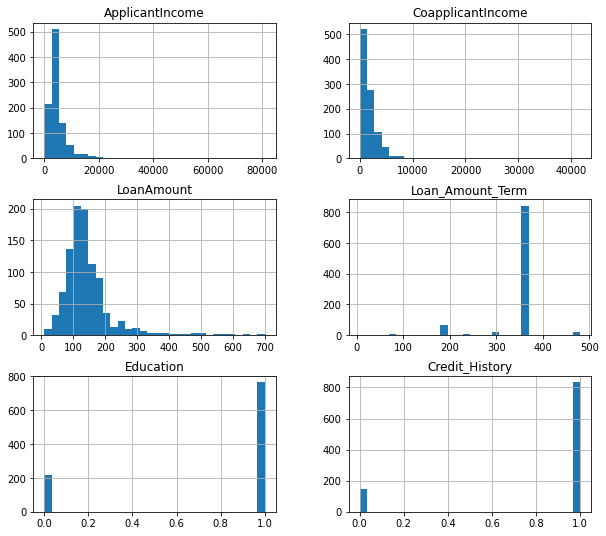

In [50]:
data.hist(bins=30,figsize=(10,9))

In [51]:
x_train=data.iloc[:614,:]
x_test=data.iloc[614:,:]

In [52]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area','Credit_History']:
    chi=pd.crosstab(x_train[i],train.Loan_Status)
    d,p=chi2(chi)
    score.append(d)
    p_value.append(p)
    print(i,d,p)

Gender 0.11087854691241235 0.7391461310869638
Married 4.73187557933362 0.029608580862582116
Dependents 3.1513990012324227 0.3688663081366005
Education 4.091490413303622 0.04309962129357353
Self_Employed 0.0 1.0
Property_Area 12.297623130485675 0.0021360187811644937
Credit_History 176.1145746235241 3.4183499979091188e-40


As we can see here after filling the missing value of of all the variable the  P value doesn't change much.

# Dummies

In [53]:
cat=x_train.select_dtypes(include=['object'])
num=x_train.select_dtypes(exclude=['object'])
cat_train=pd.get_dummies(cat,drop_first=True)
x_train=pd.concat((num,cat_train),axis=1)
cat1=x_test.select_dtypes(include=['object'])
num1=x_test.select_dtypes(exclude=['object'])
cat_test=pd.get_dummies(cat1,drop_first=True)
x_test=pd.concat((num1,cat_test),axis=1)

In [54]:
x_train.shape

(614, 14)

In [55]:
y=train.Loan_Status

In [56]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [57]:
element=x_train.columns

# Model building

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler as ss
from statsmodels import api
import statsmodels as sm
from sklearn import metrics as m

# Normalisation

In [59]:
stan=ss()
x_train=stan.fit_transform(x_train)
x_test=stan.fit_transform(x_test)

In [60]:
x_train=api.add_constant(x_train)

In [61]:
x_test=api.add_constant(x_test)

In [62]:
MODEL=sm.api.GLM(np.asarray(y),x_train,family=sm.api.families.Binomial())

In [63]:
log=MODEL.fit()

In [64]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  614
Model:                            GLM   Df Residuals:                      599
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -278.74
Date:                Mon, 07 Feb 2022   Deviance:                       557.48
Time:                        05:37:50   Pearson chi2:                     610.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2843
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8432      0.113      7.453      0.000       0.621       1.065
x1             0.0614      0.149      0.411      0.681      -0.231       0.354
x2            -0.1575      0.103     -1.528      0.127      -0.360       0.045
x3            -0.1465      0.135     -1.088      0.277      -0.411       0.117
x4            -0.0817      0.118     -0.695      0.487      -0.312       0.149
x5             0.1677      0.107      1.564      0.118      -0.042       0.378
x6             1.3856      0.148      9.349      0.000       1.095       1.676
x7            -0.0123      0.115     -0.107      0.915      -0.239       0.214
x8             0.2766      0.120      2.300      0.021       0.041       0.512
x9            -0.1758      0.110     -1.603      0.109      -0.391       0.039
x10            0.1074      0.127      0.846      0.398      -0.142       0.356
x11            0.0060      0.118      0.051      0.960      -0.224       0.236
x12           -0.0089      0.108     -0.083      0.934      -0.220       0.202
x13            0.4404      0.131      3.366      0.001       0.184       0.697
x14            0.1042      0.122      0.854      0.393      -0.135       0.343
==============================================================================
"""

As in the summary of our model we can see that what is the coefficient of of each independent variable and the P value by the help of which we can get many information regarding predicting the loan status

In [65]:
y_per=log.predict(x_train)

In [66]:
y_per

array([0.74226993, 0.69997688, 0.84403745, 0.74714247, 0.73752995,
       0.80629851, 0.76312097, 0.14079509, 0.85253784, 0.71966841,
       0.8767372 , 0.86121657, 0.79165364, 0.66007555, 0.91042604,
       0.74087089, 0.58766721, 0.05827043, 0.72891787, 0.80795754,
       0.06620847, 0.63065253, 0.10569064, 0.06071003, 0.83611359,
       0.90223965, 0.89839214, 0.8142925 , 0.68267596, 0.87459174,
       0.69789991, 0.75426162, 0.58917395, 0.90309176, 0.60458416,
       0.81631266, 0.08597566, 0.90242691, 0.63442772, 0.77805556,
       0.75312849, 0.74827414, 0.84463205, 0.8971159 , 0.77683599,
       0.75608753, 0.78708885, 0.83302663, 0.07782325, 0.83240586,
       0.86619404, 0.85295954, 0.85612343, 0.87014941, 0.04806872,
       0.92893265, 0.90497545, 0.77865048, 0.7258355 , 0.78786754,
       0.80394271, 0.84279876, 0.04701258, 0.04741122, 0.10339538,
       0.8636152 , 0.03902136, 0.70921547, 0.83523278, 0.10032915,
       0.79688318, 0.89008592, 0.86697138, 0.12426267, 0.89207

This model gives us result in probability so now we can put any threshold value according to higher Precision or higher recall.
putting threshold value 0.5 and 0.6

In [67]:
y_per1=(y_per>0.5)

In [68]:
y_per1=pd.DataFrame(y_per1)

In [69]:
y_per1=y_per1*1
print(m.confusion_matrix(y_per1,y))
print(m.classification_report(y_per1,y))

[[ 84   7]
 [108 415]]
              precision    recall  f1-score   support

           0       0.44      0.92      0.59        91
           1       0.98      0.79      0.88       523

    accuracy                           0.81       614
   macro avg       0.71      0.86      0.74       614
weighted avg       0.90      0.81      0.84       614



In [70]:
y_per2=(y_per>0.6)

In [71]:
y_per2=pd.DataFrame(y_per2)

In [72]:
y_per2=y_per2*1
print(m.confusion_matrix(y_per2,y))
print(m.classification_report(y_per2,y))

[[ 91  18]
 [101 404]]
              precision    recall  f1-score   support

           0       0.47      0.83      0.60       109
           1       0.96      0.80      0.87       505

    accuracy                           0.81       614
   macro avg       0.72      0.82      0.74       614
weighted avg       0.87      0.81      0.82       614



# For threshold value 0.5

In [73]:
pre1,rec1,thr1=m.precision_recall_curve(y,y_per1)

In [74]:
def per(pre,rec,thr):
    plt.plot(thr, pre[:-1], "b--", label="Precision")
    plt.plot(thr, rec[:-1], "g-", label="Recall")


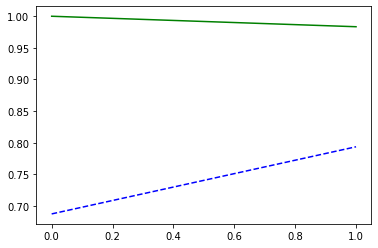

In [75]:
per(pre1,rec1,thr1)

In [76]:
fpr,tpr,thr=m.roc_curve(y_per1,y)
def plot_roc_curve(fpr, tpr, label=None):
     plt.plot(fpr, tpr, linewidth=2, label=label)
     plt.plot([0, 1], [0, 1], 'k--')

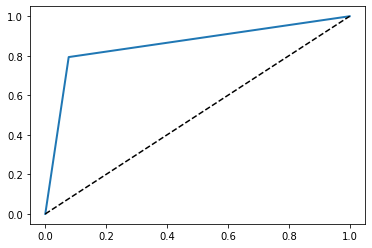

In [77]:
plot_roc_curve(fpr,tpr)

# For threshold value 0.6

In [78]:
pre2,rec2,thr2=m.precision_recall_curve(y,y_per2)

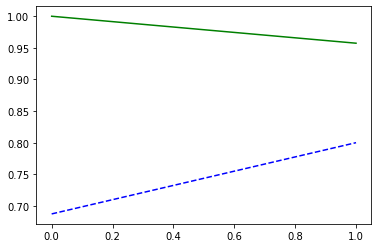

In [79]:
per(pre2,rec2,thr2)

In [80]:
fpr2,tpr2,thr2=m.roc_curve(y_per2,y)

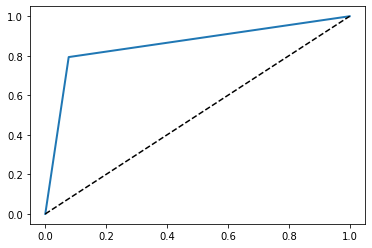

In [81]:
plot_roc_curve(fpr,tpr)

In [82]:
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression as log
from sklearn.model_selection import cross_val_score as cvs
from sklearn import metrics as m

In [83]:
def crosss(model,x,y):
    cros=cross_val_score(estimator=model,X=x,y=y,cv=10)
    return cros

# RandomForestClassifier and LogisticRegression

In [84]:
log=log()
rf=rf(n_estimators=500,max_depth=15)

In [85]:
model=[log,rf]
for i in model:
    i.fit(x_train,y)
    y_pred=i.predict(x_train)
    print(i,m.classification_report(y_pred,y))
    print(m.confusion_matrix(y_pred,y))

LogisticRegression()               precision    recall  f1-score   support

           0       0.44      0.92      0.59        91
           1       0.98      0.79      0.88       523

    accuracy                           0.81       614
   macro avg       0.71      0.86      0.74       614
weighted avg       0.90      0.81      0.84       614

[[ 84   7]
 [108 415]]
RandomForestClassifier(max_depth=15, n_estimators=500)               precision    recall  f1-score   support

           0       0.98      1.00      0.99       189
           1       1.00      0.99      1.00       425

    accuracy                           1.00       614
   macro avg       0.99      1.00      0.99       614
weighted avg       1.00      1.00      1.00       614

[[189   0]
 [  3 422]]


# Cross validation score of both model

In [86]:
for i in model:
    cros=crosss(i,x_train,y)
    print(i,cros.mean())

LogisticRegression() 0.8079587519830775
RandomForestClassifier(max_depth=15, n_estimators=500) 0.7868059227921734


# Predicting the loan_status

In [87]:
y_predict=log.predict(x_test)

In [88]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [89]:
prediction = pd.DataFrame({'loan_status':y_predict})
final_submission = pd.concat((test.Loan_ID,prediction),axis=1)

In [90]:
final_submission

,Loan_ID,loan_status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1
